# List of Environmental conditions to consider

For the SFT projects, consider the following environmental parameters for your analysis.

- Wind-sea (operation and ultimate state)
- Swell-sea (operation and ultimate state)
- Wave direction: Present the wave-direction rose diagram for wind-sea and swell-sea. <br> Consider only the dominant directions for your analysis. 
- Current speed and direction (operation and ultimate state)
- Tide (esp. if using pontoons) (operation and ultimate range)
- Seismic activity (if applicable)

# Extracting data from online dataset

We present the procedure for extracting the Hs and Tz for a location from online dataset.

## 1. Download data from onilne dataset

The following steps can be taken to extract environmental data at the location: 

1. Log in with user account on the site: <br>
https://cds.climate.copernicus.eu/user/login?destination=%2Fcdsapp%23!%2Fdataset%2Freanalysis-era5-single-levels%3Ftab%3Dform <br>
Use e-mail: makeYourEmailAccount<br>
Password: Password<br>
<img width="80%" src="./img/nb01_fig001.png" />

1. Choose **Reanalysis** and one or two variables of interest. <br>
In this case **Significant height of combined wind waves and swell**.  <br> It is noted that more detailed ocean waves data can be found under a separate tab. <br>
<img width="80%" src="./img/nb01_fig002.png" />

1. Choose one or several years. <br> 
For the statistical review it is important to have a number of years but the data which can be extracted is limited. <br> 
The choice here is to extract the years **2018**, **2019**, **2020** and **2021**. Next to this all year is chosen **January** etc. as well as all days.  <br>
<img width="80%" src="./img/nb01_fig003.png" /> 

1. For the time three hour values are chosen (to reduce the amount of data).  <br>
<img width="80%" src="./img/nb01_fig004.png" /> 

1. For Geographical area choose **Sub-region**. The longitude & latitude limits are given at the western and eastern side as well as Northern and Southern side. Data is extracted in the area between the values. <br>
<img width="80%" src="./img/nb01_fig005.png" /> 

1. On the format choose **NetCFD** <br>
<img width="80%" src="./img/nb01_fig006.png" /> 

1. If all has been filled in correctly data can be extracted. **Submit Form** <br>
<img width="80%" src="./img/nb01_fig007.png" /> 

1. The request is now shown in a new page and by expanding the product details are shown. This request took around 8 min to deliver. <br>
<img width="80%" src="./img/nb01_fig008.png" /> 

1. The data can be downloaded. Once this is done the Python script can be used to extract the data.  <br>
<img width="80%" src="./img/nb01_fig009.png" /> 


## 2. Extract data from dataset

This is achieved using **netCDF4** package

In [47]:
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from netCDF4 import Dataset
#nc = Dataset('Hs_Irish_sea_Data.nc', 'r')
nc = Dataset('wind_2023.nc', 'r')
print(nc.variables)
pass

{'longitude': <class 'netCDF4._netCDF4.Variable'>
float32 longitude(longitude)
    units: degrees_east
    long_name: longitude
unlimited dimensions: 
current shape = (3,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'latitude': <class 'netCDF4._netCDF4.Variable'>
float32 latitude(latitude)
    units: degrees_north
    long_name: latitude
unlimited dimensions: 
current shape = (3,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'time': <class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    units: hours since 1900-01-01 00:00:00.0
    long_name: time
    calendar: gregorian
unlimited dimensions: 
current shape = (2920,)
filling on, default _FillValue of -2147483647 used, 'u10': <class 'netCDF4._netCDF4.Variable'>
int16 u10(time, latitude, longitude)
    scale_factor: 0.0003893083290038511
    add_offset: 3.0919379141948733
    _FillValue: -32767
    missing_value: -32767
    units: m s**-1
    long_name: 10 metre U wind component
unlimited dimensions: 


In [48]:
lon = nc.variables['longitude']
lat = nc.variables['latitude']
time = nc.variables['time']

for d in nc.dimensions.items():
    print(d)

('longitude', <class 'netCDF4._netCDF4.Dimension'>: name = 'longitude', size = 3)
('latitude', <class 'netCDF4._netCDF4.Dimension'>: name = 'latitude', size = 3)
('time', <class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 2920)


#### The dataset contains values at 2 locations for 17536 time-instances

In [49]:
lon_array = lon[:]
lat_array = lat[:]
Time_array = time[:]

print(lon_array)

print(lat_array)

print(Time_array)
pass

[6.   6.25 6.5 ]
[62.5  62.25 62.  ]
[1078200 1078203 1078206 ... 1086951 1086954 1086957]


#### Extracting significant wave-height (hs) and zero-crossing up-crossing time-period (tz)

In [50]:
u10 = nc.variables['u10']
v10 = nc.variables['v10']

u10_array = u10[:]
v10_array = v10[:]
wind_t_array = np.sqrt(u10[:]**2 + v10[:]**2)

#print("Hs array")
#print(hs_array)

#print("Tz array")
#print(period_array)

In [51]:
i = 0 #for the present case, the values can be 0,1
j = 0 #for the present case, the values can be 0,1
u10_array = u10[:,i,j]
v10_array = v10[:,i,j]
wind_t_array = np.sqrt(u10[:, i,j]**2 + v10[:,i,j]**2)

print("u10 array")
print(u10_array)

print("v10 array")
print(v10_array)

print("total wind array")
print(wind_t_array)

u10 array
[ 6.95115138  3.60232113  0.47539663 ... -4.8452803  -5.14855149
 -5.09093385]
v10 array
[-0.77371759  2.42792923  4.95400745 ...  3.32868737  3.19833814
  3.7822128 ]
total wind array
[6.994079239417488 4.344140641671696 4.976765192491974 ...
 5.878511784026564 6.061101325126082 6.342140111692776]


#### Exporting to excel sheet

In [52]:
import xlsxwriter

workbook = xlsxwriter.Workbook('Windarrays_2023.xlsx')

worksheet = workbook.add_worksheet()

array = [Time_array,
         u10_array,
         v10_array, 
         wind_t_array]

row = 0

for col, data in enumerate(array):
    worksheet.write_column(row, col, data)

workbook.close()

## 3. Visualisation of the data

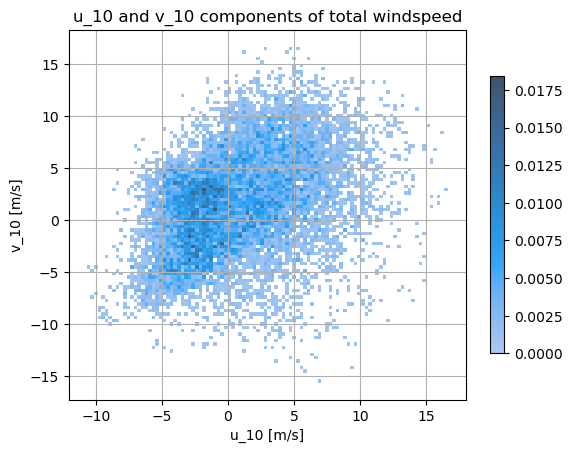

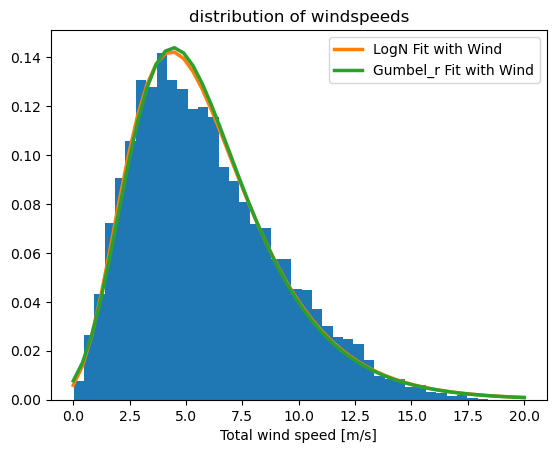

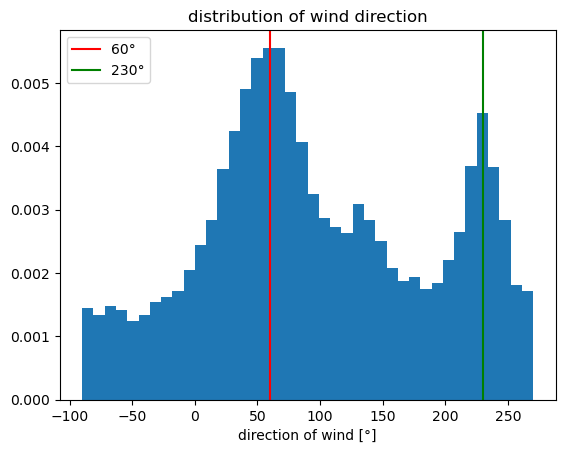

In [71]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

dataIn = pd.read_excel('Wind_array_def.xlsx')

sns.histplot(data=dataIn, x = 'u10', y = 'v10', bins=100, cbar=True, cbar_kws=dict(shrink=.75), stat='density');
plt.grid()
plt.xlabel('u_10 [m/s]')
plt.ylabel('v_10 [m/s]')
plt.title('u_10 and v_10 components of total windspeed')
plt.figure()


Wind_fit_logN = st.lognorm(*st.lognorm.fit(dataIn['Wind']))
Wind_fit_Gumbel = st.gumbel_r(*st.gumbel_r.fit(dataIn['Wind']))
plot_val = np.linspace(0,20)
plt.hist(x = dataIn['Wind'], density = True, bins = 40)
plt.plot(plot_val, Wind_fit_logN.pdf(plot_val),linewidth=2.5, label='LogN Fit with Wind')
plt.plot(plot_val, Wind_fit_Gumbel.pdf(plot_val),linewidth=2.5, label='Gumbel_r Fit with Wind')
plt.xlabel('Total wind speed [m/s]')
plt.title('distribution of windspeeds')
plt.legend()

plt.figure()
angle = np.zeros(len(dataIn['v10']))
for i in range(len(angle)):
    if dataIn['u10'][i] > 0:
        angle[i] = 360/(2*np.pi) * np.arctan(dataIn['v10'][i]/dataIn['u10'][i])
    else:
        angle[i] = 360/(2*np.pi) * np.arctan(dataIn['v10'][i]/dataIn['u10'][i]) + 180
plt.hist(angle, density = True, bins = 40)
plt.axvline(60, color = 'red', label = '60°')
plt.axvline(50+180, color = 'green', label = '230°')
plt.xlabel('direction of wind [°]')
plt.title('distribution of wind direction')
plt.legend()